# Sendy Junior Data Analyst Case Study
## 1. Data Preparation and Cleaning.
### Objective: Model to predict Cancellation Reasons
### 1.1 Load libraries and data importing

In [1]:
import pandas as pd 
pd.set_option('display.max_columns', 50)
import numpy as np
import datetime
from IPython.display import display 
#
import matplotlib.pyplot as plt 
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (18, 8)
import seaborn as sns
sns.set_style('dark')
#
import warnings
warnings.filterwarnings('ignore')
import gc                                       # memory management

In [2]:
train = pd.read_excel('Junior Data Analyst Data for Case Study.xlsx', sheet_name='Query result')
test = pd.read_excel('Junior Data Analyst Data for Case Study.xlsx', sheet_name='Missing Cancel Reason')
# Check The Shape Of The Data Loaded
print('Train data shape: {} Rows, {} Columns'.format(*train.shape))
print('Test data shape: {} Rows, {} Columns'.format(*test.shape))

Train data shape: 6398 Rows, 17 Columns
Test data shape: 329 Rows, 17 Columns


In [3]:
# Print First Few Rows Of The Data
display("Train data")
display(train.head(3))
#
display("Test data")
display(test.head(3))

'Train data'

,Personal or Business,Business Number,Vehicle Type,Standard or Express,Platform,Cancel Reason,Cancelled by,Placement Day,Placement Time,Confirmation Day,Confirmation Time,Cancellation Day,Cancellation Time,Distance (KM),Pickup Lat,Pickup Long,scheduled
0,Personal,NaN,Bike,Express,android,No driver has been allocated to my request.,Customer,1,17:55:38,NaN,NaN,1,17:56:35,9,-1.313053,36.841437,OnDemAND
1,Personal,NaN,Bike,Express,android,My order is not ready.,Customer,1,12:26:27,1.0,12:27:36,1,12:28:44,14,-1.318959,36.853394,OnDemAND
2,Business,20680.0,Bike,Express,android,I placed the wrong locations.,Customer,1,13:21:18,1.0,13:21:34,1,13:47:29,16,-1.313854,36.706867,OnDemAND


'Test data'

,Personal or Business,Business Number,Vehicle Type,Standard or Express,Platform,Cancel Reason,Cancelled by,Placement Day,Placement Time,Confirmation Day,Confirmation Time,Cancellation Day,Cancellation Time,Distance (KM),Pickup Lat,Pickup Long,scheduled
0,Personal,NaN,Bike,Express,ios,NaN,Customer,1,15:23:44,1.0,16:40:47,1,16:43:50,4,-1.299370,36.822107,OnDemAND
1,Business,20680.0,Bike,Express,desktop,NaN,Staff,1,14:21:46,1.0,14:22:20,1,14:30:48,17,-1.264490,36.789303,OnDemAND
2,Business,17968.0,Bike,Express,desktop,NaN,Customer,1,15:13:20,NaN,NaN,1,15:56:34,18,-1.427056,36.961499,OnDemAND


In [4]:
#column/variable names
display("Train data")
display(train.columns)
display("Test data")
display(test.columns)

'Train data'

Index(['Personal or Business', 'Business Number', 'Vehicle Type',
       'Standard or Express', 'Platform', 'Cancel Reason', 'Cancelled by',
       'Placement Day', 'Placement Time', 'Confirmation Day',
       'Confirmation Time', 'Cancellation Day', 'Cancellation Time',
       'Distance (KM)', 'Pickup Lat', 'Pickup Long', 'scheduled'],
      dtype='object')

'Test data'

Index(['Personal or Business', 'Business Number', 'Vehicle Type',
       'Standard or Express', 'Platform', 'Cancel Reason', 'Cancelled by',
       'Placement Day', 'Placement Time', 'Confirmation Day',
       'Confirmation Time', 'Cancellation Day', 'Cancellation Time',
       'Distance (KM)', 'Pickup Lat', 'Pickup Long', 'scheduled'],
      dtype='object')

### 1.2 Structure of the data

**Pandas Profiling the Train and Test sets**

In [5]:
#train data pandas profiling
from pandas_profiling import ProfileReport
profile = ProfileReport(train)
profile.to_file(output_file='Query_Result_Profiling_Report.html')
#
#test data pandas profiling
#profile = ProfileReport(test)
#profile.to_file(output_file='Test_Profiling.html')

Summarize dataset:   0%|          | 0/30 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### 1.3 Merge datasets
Tag the train and test data seperately with a column or variable

In [6]:
train['set'] = 'train'
test['set'] = 'test'

In [7]:
#merge the two sets of data for data analysis and visualization
data = pd.concat([train,test])
display(data.head(3))
display(data.tail(3))

,Personal or Business,Business Number,Vehicle Type,Standard or Express,Platform,Cancel Reason,Cancelled by,Placement Day,Placement Time,Confirmation Day,Confirmation Time,Cancellation Day,Cancellation Time,Distance (KM),Pickup Lat,Pickup Long,scheduled,set
0,Personal,NaN,Bike,Express,android,No driver has been allocated to my request.,Customer,1,17:55:38,NaN,NaN,1,17:56:35,9,-1.313053,36.841437,OnDemAND,train
1,Personal,NaN,Bike,Express,android,My order is not ready.,Customer,1,12:26:27,1.0,12:27:36,1,12:28:44,14,-1.318959,36.853394,OnDemAND,train
2,Business,20680.0,Bike,Express,android,I placed the wrong locations.,Customer,1,13:21:18,1.0,13:21:34,1,13:47:29,16,-1.313854,36.706867,OnDemAND,train


,Personal or Business,Business Number,Vehicle Type,Standard or Express,Platform,Cancel Reason,Cancelled by,Placement Day,Placement Time,Confirmation Day,Confirmation Time,Cancellation Day,Cancellation Time,Distance (KM),Pickup Lat,Pickup Long,scheduled,set
326,Personal,NaN,Bike,Standard,desktop,NaN,Customer,7,16:33:09,NaN,NaN,7,16:33:57,17,-1.274964,36.911953,OnDemAND,test
327,Personal,NaN,Bike,Standard,android,NaN,Customer,7,13:00:13,NaN,NaN,7,13:20:01,10,-1.324390,36.849949,OnDemAND,test
328,Personal,NaN,Bike,Standard,android,NaN,Customer,7,08:07:50,NaN,NaN,7,08:31:51,22,-1.297139,36.790044,OnDemAND,test


In [8]:
data['Cancel Reason'].unique()

array(['No driver has been allocated to my request.',
       'My order is not ready.', 'I placed the wrong locations.',
       'No Partner', 'Customer error', 'The driver is too far away.',
       'Delay', nan], dtype=object)

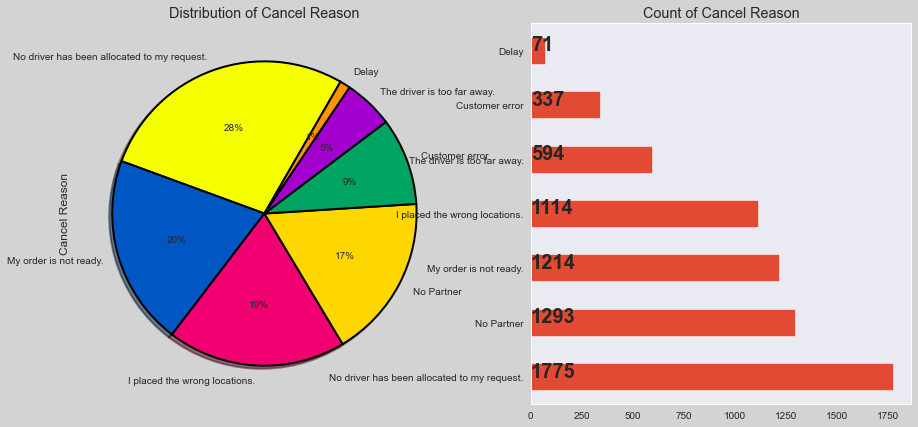

In [9]:
# Distribution of the target variable
fig = plt.figure(figsize=(15, 7))
plt.subplot(121)
data[data['set'] == "train"]["Cancel Reason"].value_counts().plot.pie(autopct = "%1.0f%%",  colors = sns.color_palette("prism",7),
                                                                                    startangle = 60,
                                                                                    labels=['No driver has been allocated to my request.',
                                                                                            'My order is not ready.', 
                                                                                            'I placed the wrong locations.',
                                                                                            'No Partner', 
                                                                                            'Customer error', 
                                                                                            'The driver is too far away.',
       'Delay'],
                                                                                    wedgeprops={"linewidth":2,"edgecolor":"k"},
                                                                                    shadow =True)
plt.title("Distribution of Cancel Reason")

plt.subplot(122)
ax = data[data['set'] == "train"]["Cancel Reason"].value_counts().plot(kind="barh")

for i,j in enumerate(data[data['set'] == "train"]["Cancel Reason"].value_counts().values):
    ax.text(.7,i,j,weight = "bold",fontsize=20)

plt.title("Count of Cancel Reason")
#ax.set_facecolor("k")
fig.set_facecolor("lightgrey")
plt.show()

### 1.4 Percentage of Missing Values

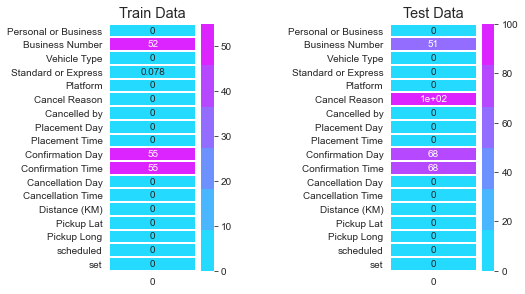

In [10]:
plt.figure(figsize=(12,10))

plt.subplot(231)
sns.heatmap(pd.DataFrame(train.isnull().sum()/train.shape[0]*100),annot=True,
            cmap=sns.color_palette("cool"),linewidth=1,linecolor="white")
plt.title("Train Data")

plt.subplot(232)
sns.heatmap(pd.DataFrame(test.isnull().sum()/test.shape[0]*100),annot=True,
            cmap=sns.color_palette("cool"),linewidth=1,linecolor="white")
plt.title("Test Data")

plt.subplots_adjust(wspace = 1.6)

### 1.5 Feature Engineering

In [11]:
#renaming columns
data.columns = data.columns.str.strip().str.lower().str.replace(' ','_')
#
#drop duplicated values in the whole data set
data.drop_duplicates(subset=data.columns, keep='last', inplace=True)
#
display(data.head(3))
display(data.dtypes)

,personal_or_business,business_number,vehicle_type,standard_or_express,platform,cancel_reason,cancelled_by,placement_day,placement_time,confirmation_day,confirmation_time,cancellation_day,cancellation_time,distance_(km),pickup_lat,pickup_long,scheduled,set
0,Personal,NaN,Bike,Express,android,No driver has been allocated to my request.,Customer,1,17:55:38,NaN,NaN,1,17:56:35,9,-1.313053,36.841437,OnDemAND,train
1,Personal,NaN,Bike,Express,android,My order is not ready.,Customer,1,12:26:27,1.0,12:27:36,1,12:28:44,14,-1.318959,36.853394,OnDemAND,train
2,Business,20680.0,Bike,Express,android,I placed the wrong locations.,Customer,1,13:21:18,1.0,13:21:34,1,13:47:29,16,-1.313854,36.706867,OnDemAND,train


personal_or_business     object
business_number         float64
vehicle_type             object
standard_or_express      object
platform                 object
cancel_reason            object
cancelled_by             object
placement_day             int64
placement_time           object
confirmation_day        float64
confirmation_time        object
cancellation_day          int64
cancellation_time        object
distance_(km)             int64
pickup_lat              float64
pickup_long             float64
scheduled                object
set                      object
dtype: object

In [12]:
data.columns

Index(['personal_or_business', 'business_number', 'vehicle_type',
       'standard_or_express', 'platform', 'cancel_reason', 'cancelled_by',
       'placement_day', 'placement_time', 'confirmation_day',
       'confirmation_time', 'cancellation_day', 'cancellation_time',
       'distance_(km)', 'pickup_lat', 'pickup_long', 'scheduled', 'set'],
      dtype='object')

In [13]:
#
data[['placement_day', 'cancellation_day']] = data[['placement_day', 
                                                    'cancellation_day']].replace({1 : 0, 2 : 1, 3 : 2, 4 : 3, 5 : 4, 6 : 5, 7 : 6}).astype(int)

**Placement Time**

In [14]:
#split the time to extract column/variables for hours, minutes and seconds
data[['placement_hours', 'placement_minutes', 'placement_seconds']] = data['placement_time'].astype(str).str.split(':', expand=True).astype(int)

**Cancellation Time**

In [15]:
#split the time to extract column/variables for hours, minutes and seconds
data[['cancellation_hours', 'cancellation_minutes', 'cancellation_seconds']] = data['cancellation_time'].astype(str).str.split(':', expand=True).astype(int)

### 1.6 Numerical Variables/Columns

### Detect and Treat Outliers

In [16]:
#define a function for treating outliers
def treat_outlier(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    print('First quantile: ', Q1)
    print('Third quantile: ', Q3)
    print('IQR: ', IQR)
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    print('Lower bound: ', lower_bound, 'Upper bound: ', upper_bound)

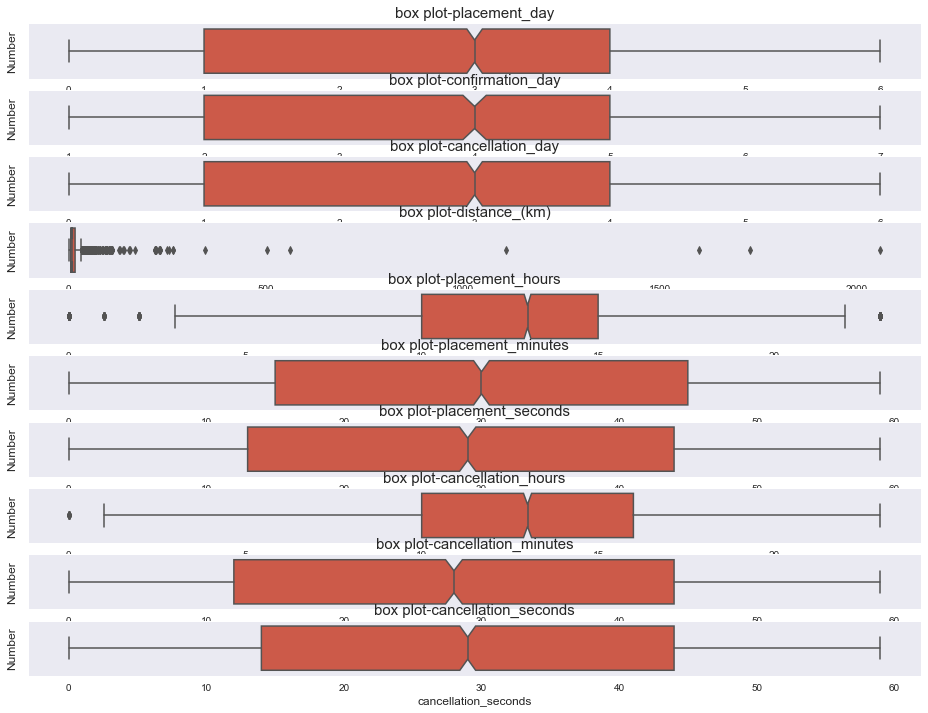

In [17]:
#checking for outliers using box plot
col_names = ['placement_day', 'confirmation_day', 'cancellation_day', 'distance_(km)', 'placement_hours', 
             'placement_minutes', 'placement_seconds', 
             'cancellation_hours', 'cancellation_minutes', 'cancellation_seconds']
fig, ax=plt.subplots(len(col_names), figsize=(16,12))
for i, col_val in enumerate(col_names):
    sns.boxplot(data[col_val], notch= True, ax=ax[i])
    ax[i].set_title ('box plot-'+ col_val, fontsize= 15)
    ax[i].set_xlabel(col_val, fontsize= 12)
    ax[i].set_ylabel('Number', fontsize= 12)

plt.show()  

From the box plots above we find that **placement hours, placement minutes, cancellation minutes** have outliers and so the objective to normalize the numerical variables to optimum.

**Remove outliers.**

In [18]:
#placement hours
treat_outlier(data, 'placement_hours')

First quantile:  10.0
Third quantile:  15.0
IQR:  5.0
Lower bound:  2.5 Upper bound:  22.5


In [19]:
data = data[(data['placement_hours'] > 2.5) & (data['placement_hours'] < 22.5)]

In [20]:
#placement minutes
treat_outlier(data, 'placement_minutes')

First quantile:  15.0
Third quantile:  45.0
IQR:  30.0
Lower bound:  -30.0 Upper bound:  90.0


In [21]:
data = data[(data['placement_minutes'] > -30.0) & (data['placement_minutes'] < 90)]

In [22]:
#cancellation minutes
treat_outlier(data, 'cancellation_minutes')

First quantile:  13.0
Third quantile:  44.0
IQR:  31.0
Lower bound:  -33.5 Upper bound:  90.5


In [23]:
data = data[(data['cancellation_minutes'] > -33.5) & (data['cancellation_minutes'] < 90.5)]

### 1.7 Categorical Variable/Columns

### 1.7.1 Dummify the variables/columns, split, and export to csv

In [24]:
#Dummify the variables
data = pd.get_dummies(data, dummy_na=True, 
                      columns=['personal_or_business', 
                               'vehicle_type', 
                               'standard_or_express', 
                               'platform', 
                               'cancelled_by',
                               'scheduled'], 
                      drop_first=True, 
                      prefix=['personal_or_business', 
                               'vehicle_type', 
                               'standard_or_express', 
                               'platform', 
                               'cancelled_by',
                               'scheduled'])
#
#rename cancellation reason as well as map the values to be one hot encoded
data.rename(columns={'cancel_reason': 'target'}, inplace=True)
data['target'] = data['target'].replace({'No driver has been allocated to my request.': 0,
                                         'My order is not ready.': 1, 
                                         'I placed the wrong locations.': 2,
                                         'No Partner': 3, 
                                         'Customer error': 4, 
                                         'The driver is too far away.': 5,
                                         'Delay': 6})
#
#remove some columns
columns = ['business_number', 'placement_time', 'confirmation_time', 'cancellation_time','confirmation_day', 
           'pickup_lat', 'pickup_long']
data.drop(columns, inplace=True, axis=1)
display(data.head(3))

,target,placement_day,cancellation_day,distance_(km),set,placement_hours,placement_minutes,placement_seconds,cancellation_hours,cancellation_minutes,cancellation_seconds,personal_or_business_Personal,personal_or_business_nan,vehicle_type_Standard Bike,vehicle_type_nan,standard_or_express_Standard,standard_or_express_nan,platform_android,platform_desktop,platform_ios,platform_peer_web,platform_nan,cancelled_by_Staff,cancelled_by_nan,scheduled_Scheduled,scheduled_nan
0,0.0,0,0,9,train,17,55,38,17,56,35,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,1.0,0,0,14,train,12,26,27,12,28,44,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,2.0,0,0,16,train,13,21,18,13,47,29,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [25]:
# encode the integer columns by their frequency 
int_col=['placement_day','cancellation_day','placement_hours', 'placement_minutes', 'placement_seconds', 
         'cancellation_hours', 'cancellation_minutes', 'cancellation_seconds']
for col in int_col:
    freq = data[col].value_counts().to_dict()
    data[col + '_freq_encode'] = data[col].map(freq)

In [26]:
#split the dataframe
train = data[data['set'] == 'train']
test = data[data['set'] == 'test']

In [27]:
#drop the set column and reset the index
train.drop(['set'], inplace=True, axis=1)
train.reset_index(drop = True, inplace=True)
test.drop(['target', 'set'], inplace=True, axis=1)
test.reset_index(drop = True, inplace=True)

In [28]:
#write to csv for variable and model selection 
train.to_csv('train_clean.csv', index=False)
test.to_csv('test_clean.csv', index=False)

In [29]:
###################################################################################################

## 2. Model Selection and Variable importance

### 2.1 Load the cleaned datasets

In [30]:
#import the cleaned datasets
train = pd.read_csv('train_clean.csv')
test = pd.read_csv('test_clean.csv')
#
# Check The Shape Of The Data Loaded
print('Train data shape: {} Rows, {} Columns'.format(*train.shape))
print('Test data shape: {} Rows, {} Columns'.format(*test.shape))

Train data shape: 6297 Rows, 33 Columns
Test data shape: 324 Rows, 32 Columns


### 2.2 Feature Importance
We implement our own recurcive feature elimination method

In [31]:
# modelling 
import lightgbm as lgb
#
# utilities
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder

In [32]:
y = train[['target']].astype(int)
#label encode to convet to a multiclass variable
lab_enc = LabelEncoder()
y = lab_enc.fit_transform(y)
#
X = train.drop(['target'], axis=1)
display(X.head(2))

,placement_day,cancellation_day,distance_(km),placement_hours,placement_minutes,placement_seconds,cancellation_hours,cancellation_minutes,cancellation_seconds,personal_or_business_Personal,personal_or_business_nan,vehicle_type_Standard Bike,vehicle_type_nan,standard_or_express_Standard,standard_or_express_nan,platform_android,platform_desktop,platform_ios,platform_peer_web,platform_nan,cancelled_by_Staff,cancelled_by_nan,scheduled_Scheduled,scheduled_nan,placement_day_freq_encode,cancellation_day_freq_encode,placement_hours_freq_encode,placement_minutes_freq_encode,placement_seconds_freq_encode,cancellation_hours_freq_encode,cancellation_minutes_freq_encode,cancellation_seconds_freq_encode
0,0,0,9,17,55,38,17,56,35,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,985,917,345,101,137,436,100,94
1,0,0,14,12,26,27,12,28,44,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,985,917,686,101,112,658,111,128


In [33]:
display(y.shape)
display(X.shape)

(6297,)

(6297, 32)

In [34]:
# Create the model with several hyperparameters
model = lgb.LGBMClassifier(objective='multiclass', 
                           boosting_type = 'goss', 
                           n_estimators = 10000, 
                           class_weight = 'balanced')

In [35]:
train_columns = ['placement_day', 'cancellation_day', 'distance_(km)', 'placement_hours',
       'placement_minutes', 'placement_seconds', 'cancellation_hours',
       'cancellation_minutes', 'cancellation_seconds',
       'personal_or_business_Personal', 'personal_or_business_nan',
       'vehicle_type_Standard Bike', 'vehicle_type_nan',
       'standard_or_express_Standard', 'standard_or_express_nan',
       'platform_android', 'platform_desktop', 'platform_ios',
       'platform_peer_web', 'platform_nan', 'cancelled_by_Staff',
       'cancelled_by_nan', 'scheduled_Scheduled', 'scheduled_nan',
       'placement_day_freq_encode', 'cancellation_day_freq_encode',
       'placement_hours_freq_encode', 'placement_minutes_freq_encode',
       'placement_seconds_freq_encode', 'cancellation_hours_freq_encode',
       'cancellation_minutes_freq_encode', 'cancellation_seconds_freq_encode']

In [36]:
# Split into training and validation set
train_features, valid_features, train_y, valid_y = train_test_split(X, y, test_size = 0.3, random_state = 27)
# Train using early stopping
model.fit(train_features, train_y, 
          eval_metric = 'logloss', 
          verbose = 200)

LGBMClassifier(boosting_type='goss', class_weight='balanced',
               n_estimators=10000, objective='multiclass')

### 2.2.1 Feature importance percentages

In [37]:
#define a function to create variable importance dataframe
def get_lgbm_varimp(model, train_columns, max_vars=50):
    
    # Scikit-learn API LGBMClassifier or LGBMRegressor was fitted, 
    # so using feature_importances_ property
    feature_importances_perc = (model.feature_importances_ / sum(model.feature_importances_)) * 100
    cv_varimp_df = pd.DataFrame([train_columns, feature_importances_perc]).T

    cv_varimp_df.columns = ['feature_name', 'varimp']

    cv_varimp_df.sort_values(by='varimp', ascending=False, inplace=True)

    cv_varimp_df = cv_varimp_df.iloc[0:max_vars]   

    return cv_varimp_df

In [38]:
get_lgbm_varimp(model, train_columns)

,feature_name,varimp
8,cancellation_seconds,9.249
5,placement_seconds,9.13709
7,cancellation_minutes,8.9041
4,placement_minutes,8.76853
2,distance_(km),7.80962
28,placement_seconds_freq_encode,7.43522
31,cancellation_seconds_freq_encode,7.42428
27,placement_minutes_freq_encode,7.37087
30,cancellation_minutes_freq_encode,7.09235
26,placement_hours_freq_encode,3.97272


### 2.2.2 Plot for the percentages of Feature Importance

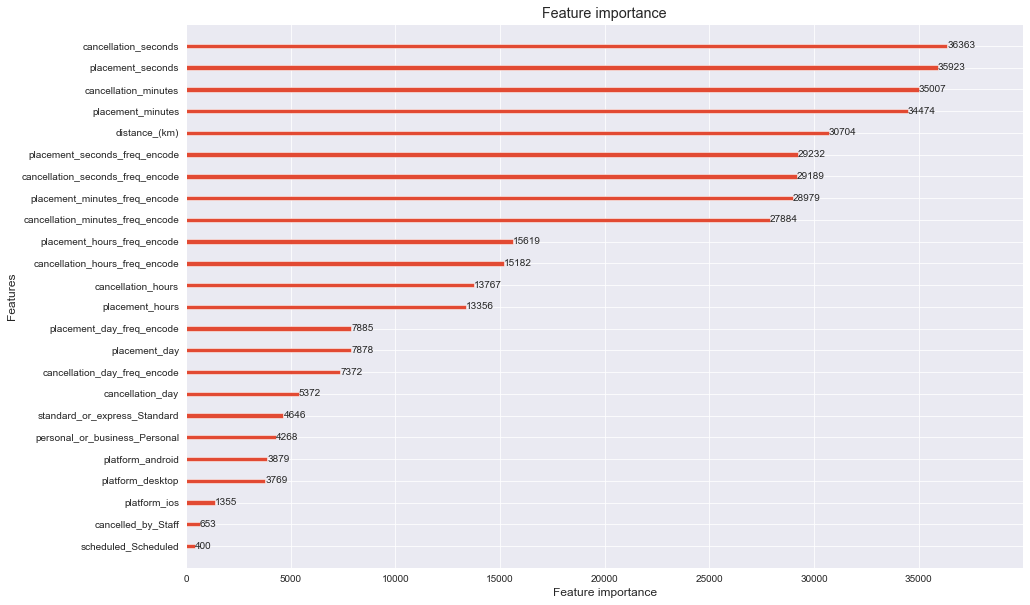

In [39]:
#plot the variable importance
ax=lgb.plot_importance(model, max_num_features=40, figsize=(15,10))
plt.show()

In [40]:
#drop irrelevant columns/variables from X features
columns = ['cancelled_by_nan', 'platform_nan', 'vehicle_type_nan', 'platform_peer_web','standard_or_express_nan', 
           'vehicle_type_Standard Bike', 'personal_or_business_nan', 'scheduled_nan']
X.drop(columns, inplace=True, axis=1)

### 2.2.3 Check Imbalance in the target variable/column
The target variable being a multi-class has a probability of some classes having more example than others

Class=0, n=1763 (27.997%)
Class=1, n=1204 (19.120%)
Class=2, n=1106 (17.564%)
Class=3, n=1228 (19.501%)
Class=4, n=336 (5.336%)
Class=5, n=589 (9.354%)
Class=6, n=71 (1.128%)


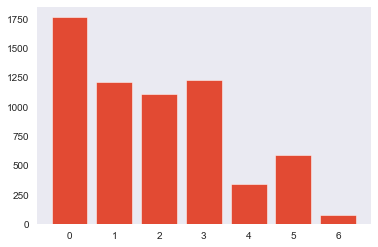

In [41]:
from collections import Counter
import matplotlib.pyplot as plt
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
#
#plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

The classes in the target variable are imbalanced, we use SMOTE to oversample the dataset

In [42]:
#oversample the data to balance the target variable
from imblearn.over_sampling import SMOTE
# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

**Over-sampled data (balanced target variable)**

Class=0, n=1763 (14.286%)
Class=1, n=1763 (14.286%)
Class=2, n=1763 (14.286%)
Class=3, n=1763 (14.286%)
Class=4, n=1763 (14.286%)
Class=5, n=1763 (14.286%)
Class=6, n=1763 (14.286%)


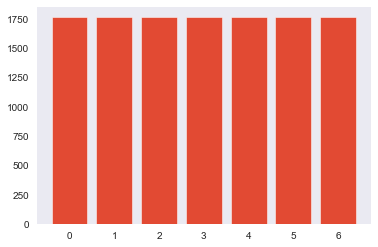

In [43]:
from collections import Counter
import matplotlib.pyplot as plt
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
#plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

### 2.3 Model Selection
Identify the best model with higher accuracy from a list of classifier models

**Calculate the baseline.**

In [44]:
#split model
import random
random.seed(1234)
x_train, x_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)
#
#model the training set and calculate the metrics
clf = lgb.LGBMClassifier().fit(x_train, y_train)
#
from sklearn.metrics import log_loss, accuracy_score
print('Log Loss: ', log_loss(y_valid, clf.predict_proba(x_valid)))
print('Accuracy: ', accuracy_score(y_valid, clf.predict(x_valid)))

Log Loss:  0.6786745525024142
Accuracy:  0.7059141236834998


In [45]:
print('X_train: ', x_train.shape, 'X_test: ', x_valid.shape, 'y_train: ', y_train.shape, 'y_test: ', y_valid.shape)

X_train:  (8638, 24) X_test:  (3703, 24) y_train:  (8638,) y_test:  (3703,)


In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
import lightgbm as lgb
from sklearn.neural_network import MLPClassifier #Neural networks
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import log_loss, accuracy_score
#
models = [
    RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0),
    SVC(decision_function_shape="ovo"),
    LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial'),
    AdaBoostClassifier(),
    CatBoostClassifier(iterations=300, depth=6, learning_rate=0.1, logging_level='Silent',
                        eval_metric='Accuracy', random_state=42),
    KNeighborsClassifier(),
    GradientBoostingClassifier(),
    XGBClassifier(objective='multi:softprob', eval_metric='logloss', learning_rate=0.1, max_depth=4, seed=27,
                  n_estimators=20),
    lgb.LGBMClassifier(objective='multiclass', 
                           boosting_type = 'goss', 
                           n_estimators = 1000, 
                           class_weight = 'balanced'),
    MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(150, 10), random_state=1),
    DecisionTreeClassifier(max_depth = 2)
]
#
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, X, y, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
print(cv_df.groupby('model_name').accuracy.mean().sort_values())

model_name
MLPClassifier                 0.142695
SVC                           0.185798
LogisticRegression            0.232800
AdaBoostClassifier            0.359780
DecisionTreeClassifier        0.366664
RandomForestClassifier        0.431814
XGBClassifier                 0.447858
GradientBoostingClassifier    0.516655
KNeighborsClassifier          0.563004
CatBoostClassifier            0.580347
LGBMClassifier                0.675232
Name: accuracy, dtype: float64


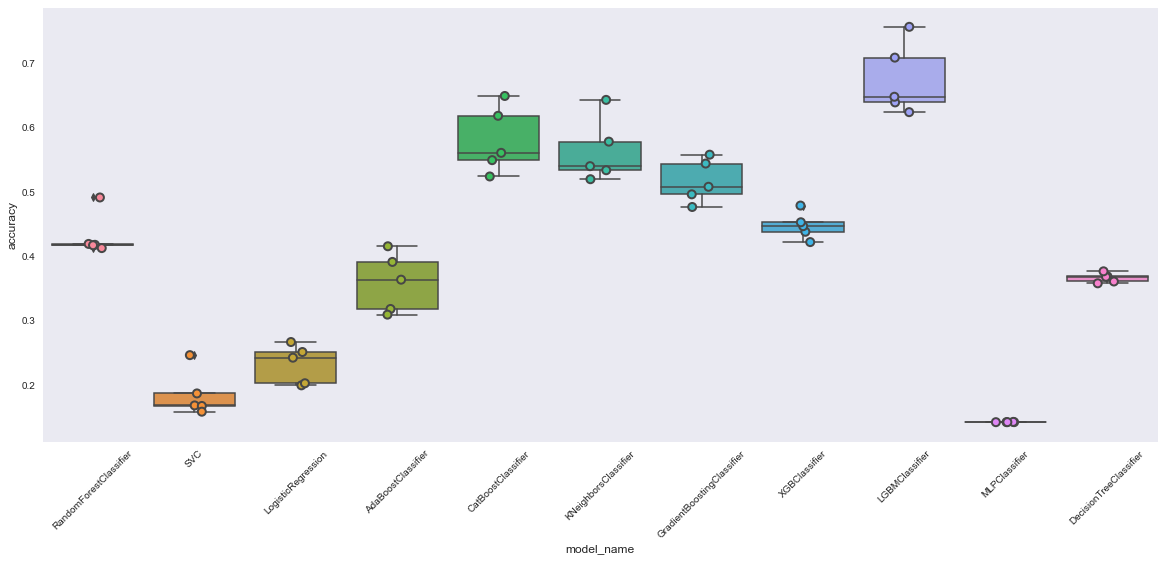

In [47]:
fig, ax = plt.subplots()
fig.set_size_inches(20,8)
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()

### 2.4 RandomForest Classifier

In [48]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=1500, class_weight='balanced')
rf.fit(x_train, y_train)
#
rf_pred=rf.predict(x_valid)
#
print('Log Loss: ', log_loss(y_valid, rf.predict_proba(x_valid)))
print("Accuracy:", accuracy_score(y_valid, rf_pred))
#
from sklearn.metrics import mean_squared_error, classification_report
mse=mean_squared_error(y_valid, rf_pred)
print('RandomForest-RMSE: ', np.sqrt(mse))
#
#classification Report
print(classification_report(y_valid, rf_pred))

Log Loss:  0.7148010235510329
Accuracy: 0.7396705374021064
RandomForest-RMSE:  1.3070365662334162
              precision    recall  f1-score   support

           0       0.52      0.55      0.53       532
           1       0.55      0.45      0.50       544
           2       0.64      0.55      0.59       532
           3       0.93      0.86      0.90       549
           4       0.88      0.93      0.91       525
           5       0.68      0.86      0.76       517
           6       0.97      0.99      0.98       504

    accuracy                           0.74      3703
   macro avg       0.74      0.74      0.74      3703
weighted avg       0.74      0.74      0.74      3703



### 2.5 LightGBM Classifier

In [49]:
lgbm = lgb.LGBMClassifier(objective='multiclass', 
                           boosting_type = 'goss', 
                           n_estimators = 1000, 
                           class_weight = 'balanced')
lgbm.fit(x_train, y_train)
#
lgbm_pred=lgbm.predict(x_valid)
#
print('Log Loss: ', log_loss(y_valid, lgbm.predict_proba(x_valid)))
print("Accuracy:", accuracy_score(y_valid, rf_pred))
#
from sklearn.metrics import mean_squared_error, classification_report
mse=mean_squared_error(y_valid, lgbm_pred)
print('RandomForest-RMSE: ', np.sqrt(mse))
#
#classification Report
print(classification_report(y_valid, lgbm_pred))

Log Loss:  1.0674976979149138
Accuracy: 0.7396705374021064
RandomForest-RMSE:  1.2299705025784442
              precision    recall  f1-score   support

           0       0.49      0.50      0.49       532
           1       0.54      0.50      0.52       544
           2       0.55      0.55      0.55       532
           3       0.93      0.91      0.92       549
           4       0.91      0.92      0.92       525
           5       0.76      0.81      0.78       517
           6       0.98      1.00      0.99       504

    accuracy                           0.74      3703
   macro avg       0.74      0.74      0.74      3703
weighted avg       0.74      0.74      0.74      3703



## 3. Predict the the data with Missing Cancel Reason (Test data)

In [50]:
#drop irrelevant columns/variables from X features
columns = ['cancelled_by_nan', 'platform_nan', 'vehicle_type_nan', 'platform_peer_web','standard_or_express_nan', 
           'vehicle_type_Standard Bike', 'personal_or_business_nan', 'scheduled_nan']
test.drop(columns, inplace=True, axis=1)

In [51]:
pred = rf.predict(test)
#
submission=pd.DataFrame()
submission['cancel_reason'] = pred.reshape((pred.shape[0]))
#
submission['cancel_reason'] = submission['cancel_reason'].replace({0: 'No driver has been allocated to my request.',
                                         1: 'My order is not ready.', 
                                         2: 'I placed the wrong locations.',
                                         3: 'No Partner', 
                                         4: 'Customer error', 
                                         5: 'The driver is too far away.',
                                         6: 'Delay'})
#
submission.to_csv('catboost_submission.csv',index=False) #export the predicted values as csv 
#
#relad the predicted data
file1=pd.read_csv('catboost_submission.csv')
display(file1.head())

,cancel_reason
0,The driver is too far away.
1,No Partner
2,I placed the wrong locations.
3,My order is not ready.
4,No Partner


In [52]:
file1.cancel_reason.unique()

array(['The driver is too far away.', 'No Partner',
       'I placed the wrong locations.', 'My order is not ready.',
       'No driver has been allocated to my request.', 'Delay',
       'Customer error'], dtype=object)

In [53]:
pred = lgbm.predict(test)
#
submission=pd.DataFrame()
submission['cancel_reason'] = pred.reshape((pred.shape[0]))
#
submission['cancel_reason'] = submission['cancel_reason'].replace({0: 'No driver has been allocated to my request.',
                                         1: 'My order is not ready.', 
                                         2: 'I placed the wrong locations.',
                                         3: 'No Partner', 
                                         4: 'Customer error', 
                                         5: 'The driver is too far away.',
                                         6: 'Delay'})
#
submission.to_csv('LightGBM_submission.csv',index=False) #export the predicted values as csv 
#
#relad the predicted data
file2=pd.read_csv('LightGBM_submission.csv')
display(file2.head())

,cancel_reason
0,No driver has been allocated to my request.
1,No Partner
2,My order is not ready.
3,My order is not ready.
4,No Partner


We opt for **LightGBM** with higher precision, recall, and accuracy

## 4. Serialize LightGBM Model

In [54]:
import pickle
pickle.dump(model, open('LightGBM_model.pkl','wb'))

In [55]:
###########################################################################################################################